___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [ ]:
# KATEGORİC VERİLER INTEGER OLARAK DA KARŞIMIZA ÇIKABİLECEĞİ İÇİN GETDUMMIES'İ ES GEÇMEMEK LAZIM.
# VERİ AZ OLUNCA RANDOM_STATE İLE OYNANINCA ÇOK FAKLI SONUÇLAR ALINABİLİR.

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
# for MULTI OUTPUT in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# DF LERi YAN YANA AYNI SATIRDA GORUNTULEME: row-reverse, column, column-reverse
# display() fonksiyonu ile birlikte kullan.
from IPython.core.display import HTML
CSS = """.output {flex-direction: row; }"""
HTML('<style>{}</style>'.format(CSS))
# EKRAN GENISLIGINI AYARLAMA:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
# makes strings colored
import colorama
from colorama import Fore, Style
from termcolor import colored

# Ingest the data to notebook

In [9]:
df_copy = pd.read_csv('heart.csv')
df = df_copy.copy()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


# EDA

In [11]:
df = df.drop_duplicates(keep='first')

In [3]:
# first_clean_look(df)

Shape:(303, 14)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None 
 -------------------------------------------------------------------------------
Number of Uniques:
 age      

In [12]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})
df['thal']=df['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.300,0,0,1,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.500,0,0,2,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.400,flat,0,2,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.800,flat,0,2,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.600,flat,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,241,0,having ST-T wave abnormality,123,1,0.200,upsloping,0,normal,0
299,45,1,asymptomatic,110,264,0,having ST-T wave abnormality,132,0,1.200,upsloping,0,normal,0
300,68,1,typical angina,144,193,1,having ST-T wave abnormality,141,0,3.400,upsloping,2,normal,0
301,57,1,typical angina,130,131,0,having ST-T wave abnormality,115,1,1.200,upsloping,1,normal,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        302 non-null    int64  
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 35.4+ KB


In [14]:
for col in df.select_dtypes('number'):
    print(f"{col:<20}:", df[col].nunique())

age                 : 41
sex                 : 2
trestbps            : 49
chol                : 152
fbs                 : 2
thalach             : 91
exang               : 2
oldpeak             : 40
ca                  : 5
target              : 2


In [17]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

cp                  : 4
restecg             : 3
slope               : 3
thal                : 4


In [18]:
df.cp.value_counts() 
df.restecg.value_counts()
df.slope.value_counts()
df.ca.value_counts()
df.thal.value_counts()

typical angina      143
non-anginal pain     86
atypical angina      50
asymptomatic         23
Name: cp, dtype: int64

having ST-T wave abnormality    151
normal                          147
left ventricular hypertrophy      4
Name: restecg, dtype: int64

flat         141
upsloping    140
0             21
Name: slope, dtype: int64

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

2         165
normal    117
1          18
0           2
Name: thal, dtype: int64

In [ ]:
# Dikkat: 4 tane restec "left ventricular hypertrophy", 4 tane ca 4, 2 tane thal 0 var.

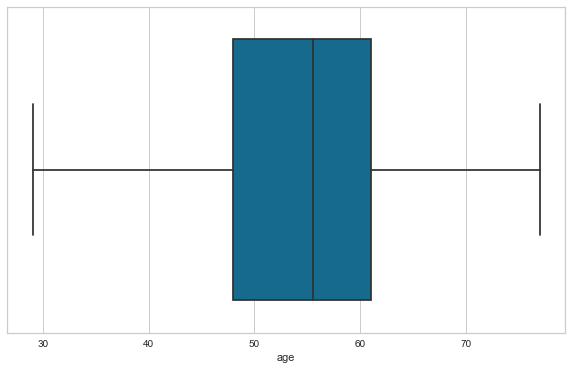

In [19]:
sns.boxplot(df.age);

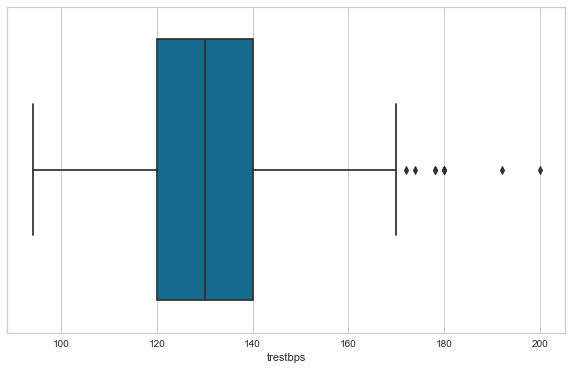

In [20]:
sns.boxplot(df.trestbps); # dinlenme kan basıncı oranı. outlierları atıp score aldığımızda scorelar düştü.

In [ ]:
# trestbps  > 190 olanlara dikkat

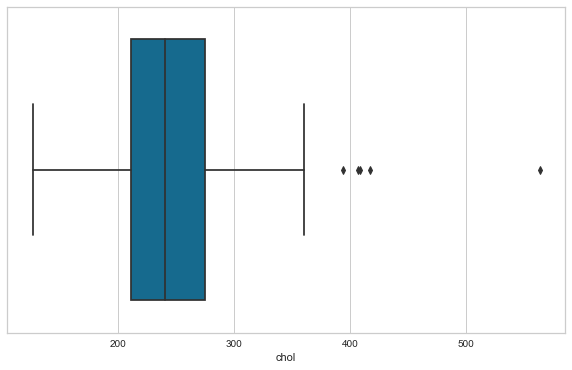

In [21]:
sns.boxplot(df.chol);

In [ ]:
# chol > 430 olanlara dikkat

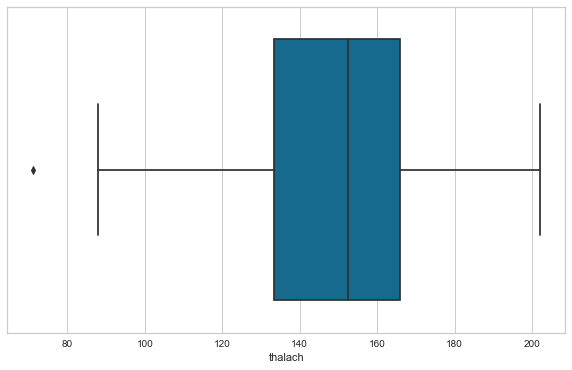

In [22]:
sns.boxplot(df.thalach);  # max kalp atışı

In [ ]:
thalach < 85 olanlara dikkat

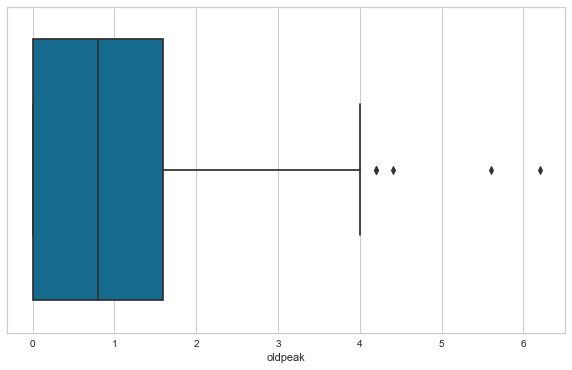

In [23]:
sns.boxplot(df.oldpeak);  # büyük kan damar sayısı

In [ ]:
oldpeak > 5.5 olanlara dikkat

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.000,54.421,9.048,29.000,48.000,55.500,61.000,77.000
sex,302.000,0.682,0.466,0.000,0.000,1.000,1.000,1.000
trestbps,302.000,131.603,17.563,94.000,120.000,130.000,140.000,200.000
chol,302.000,246.500,51.753,126.000,211.000,240.500,274.750,564.000
fbs,302.000,0.149,0.357,0.000,0.000,0.000,0.000,1.000
thalach,302.000,149.570,22.904,71.000,133.250,152.500,166.000,202.000
exang,302.000,0.328,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,302.000,1.043,1.161,0.000,0.000,0.800,1.600,6.200
ca,302.000,0.719,1.007,0.000,0.000,0.000,1.000,4.000
target,302.000,0.543,0.499,0.000,0.000,1.000,1.000,1.000


In [ ]:
MİNİMUM DEĞERLERİ SIFIR OLAN SÜTUNLARDA "MISSING VALUE" KAPSAMINDA SIFIR/BOŞ DEĞER VAR MI?
sex     0 = female
cp      0 = typical angina 
fbs     0 = False
restecg 0 = normal
exng    0 = None
ca      0 = number of major vessels
oldpeak 0 = ? 98 tane, missing value değil
slope   0 = ? 21 tane
thal    0 = ? 2 tane, ihmal edilebilir mi?

In [25]:
df['oldpeak'].value_counts()

0.000    98
1.200    17
1.000    14
0.600    14
0.800    13
1.400    13
0.200    12
1.600    11
1.800    10
0.400     9
2.000     9
0.100     7
2.600     6
2.800     6
1.900     5
0.500     5
1.500     5
3.000     5
2.200     4
3.600     4
0.300     3
2.400     3
0.900     3
4.000     3
3.400     3
2.300     2
1.100     2
4.200     2
3.200     2
2.500     2
3.500     1
1.300     1
3.800     1
6.200     1
5.600     1
3.100     1
2.900     1
4.400     1
0.700     1
2.100     1
Name: oldpeak, dtype: int64

In [36]:
df['slope'].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

In [37]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

# Data Preprocessing

In [26]:
# logistic modelde multicollınearıty sorun değil ama yine de bakmak faydalı olur.
# % 90 DAN FAZLA KORELASYON VAR MI?
# TEK any(), HER BİR SÜTUN İÇİN T/F DÖNDÜRÜR, ÇİFT any().any() TÜM DF İÇİN TEK BİR T/F DÖNDÜRÜR.
df.corr()[(df.corr()>= 0.9) & (df.corr() < 1)].any().any()

False

In [27]:
# NEGATİF KORELASYONU DA KONTROL ETMEK İÇİN:
df.corr()[(df.corr()<= -0.9) & (df.corr() > -1)].any().any()

False

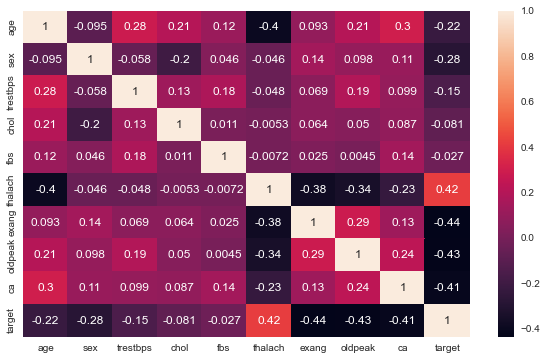

In [28]:
sns.heatmap(df.corr(), annot=True);

In [29]:
df.corr()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
age,1.000,-0.095,0.283,0.207,0.119,-0.395,0.093,0.206,0.302,-0.221
sex,-0.095,1.000,-0.058,-0.196,0.046,-0.046,0.143,0.098,0.113,-0.284
trestbps,0.283,-0.058,1.000,0.125,0.178,-0.048,0.069,0.195,0.099,-0.146
chol,0.207,-0.196,0.125,1.000,0.011,-0.005,0.064,0.050,0.087,-0.081
fbs,0.119,0.046,0.178,0.011,1.000,-0.007,0.025,0.005,0.145,-0.027
thalach,-0.395,-0.046,-0.048,-0.005,-0.007,1.000,-0.377,-0.342,-0.228,0.420
exang,0.093,0.143,0.069,0.064,0.025,-0.377,1.000,0.287,0.125,-0.436
oldpeak,0.206,0.098,0.195,0.050,0.005,-0.342,0.287,1.000,0.237,-0.429
ca,0.302,0.113,0.099,0.087,0.145,-0.228,0.125,0.237,1.000,-0.409
target,-0.221,-0.284,-0.146,-0.081,-0.027,0.420,-0.436,-0.429,-0.409,1.000


<AxesSubplot:>

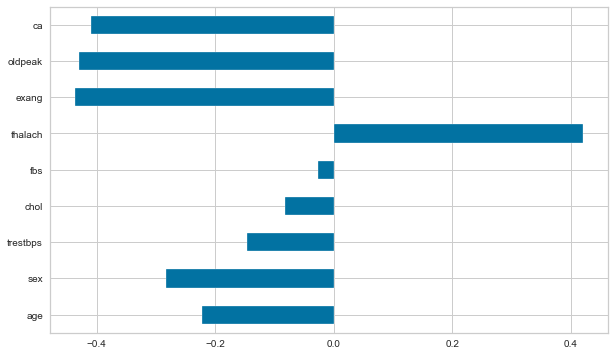

In [30]:
# Correlation of each column with target column:
df.corr()['target'].drop('target').plot.barh()

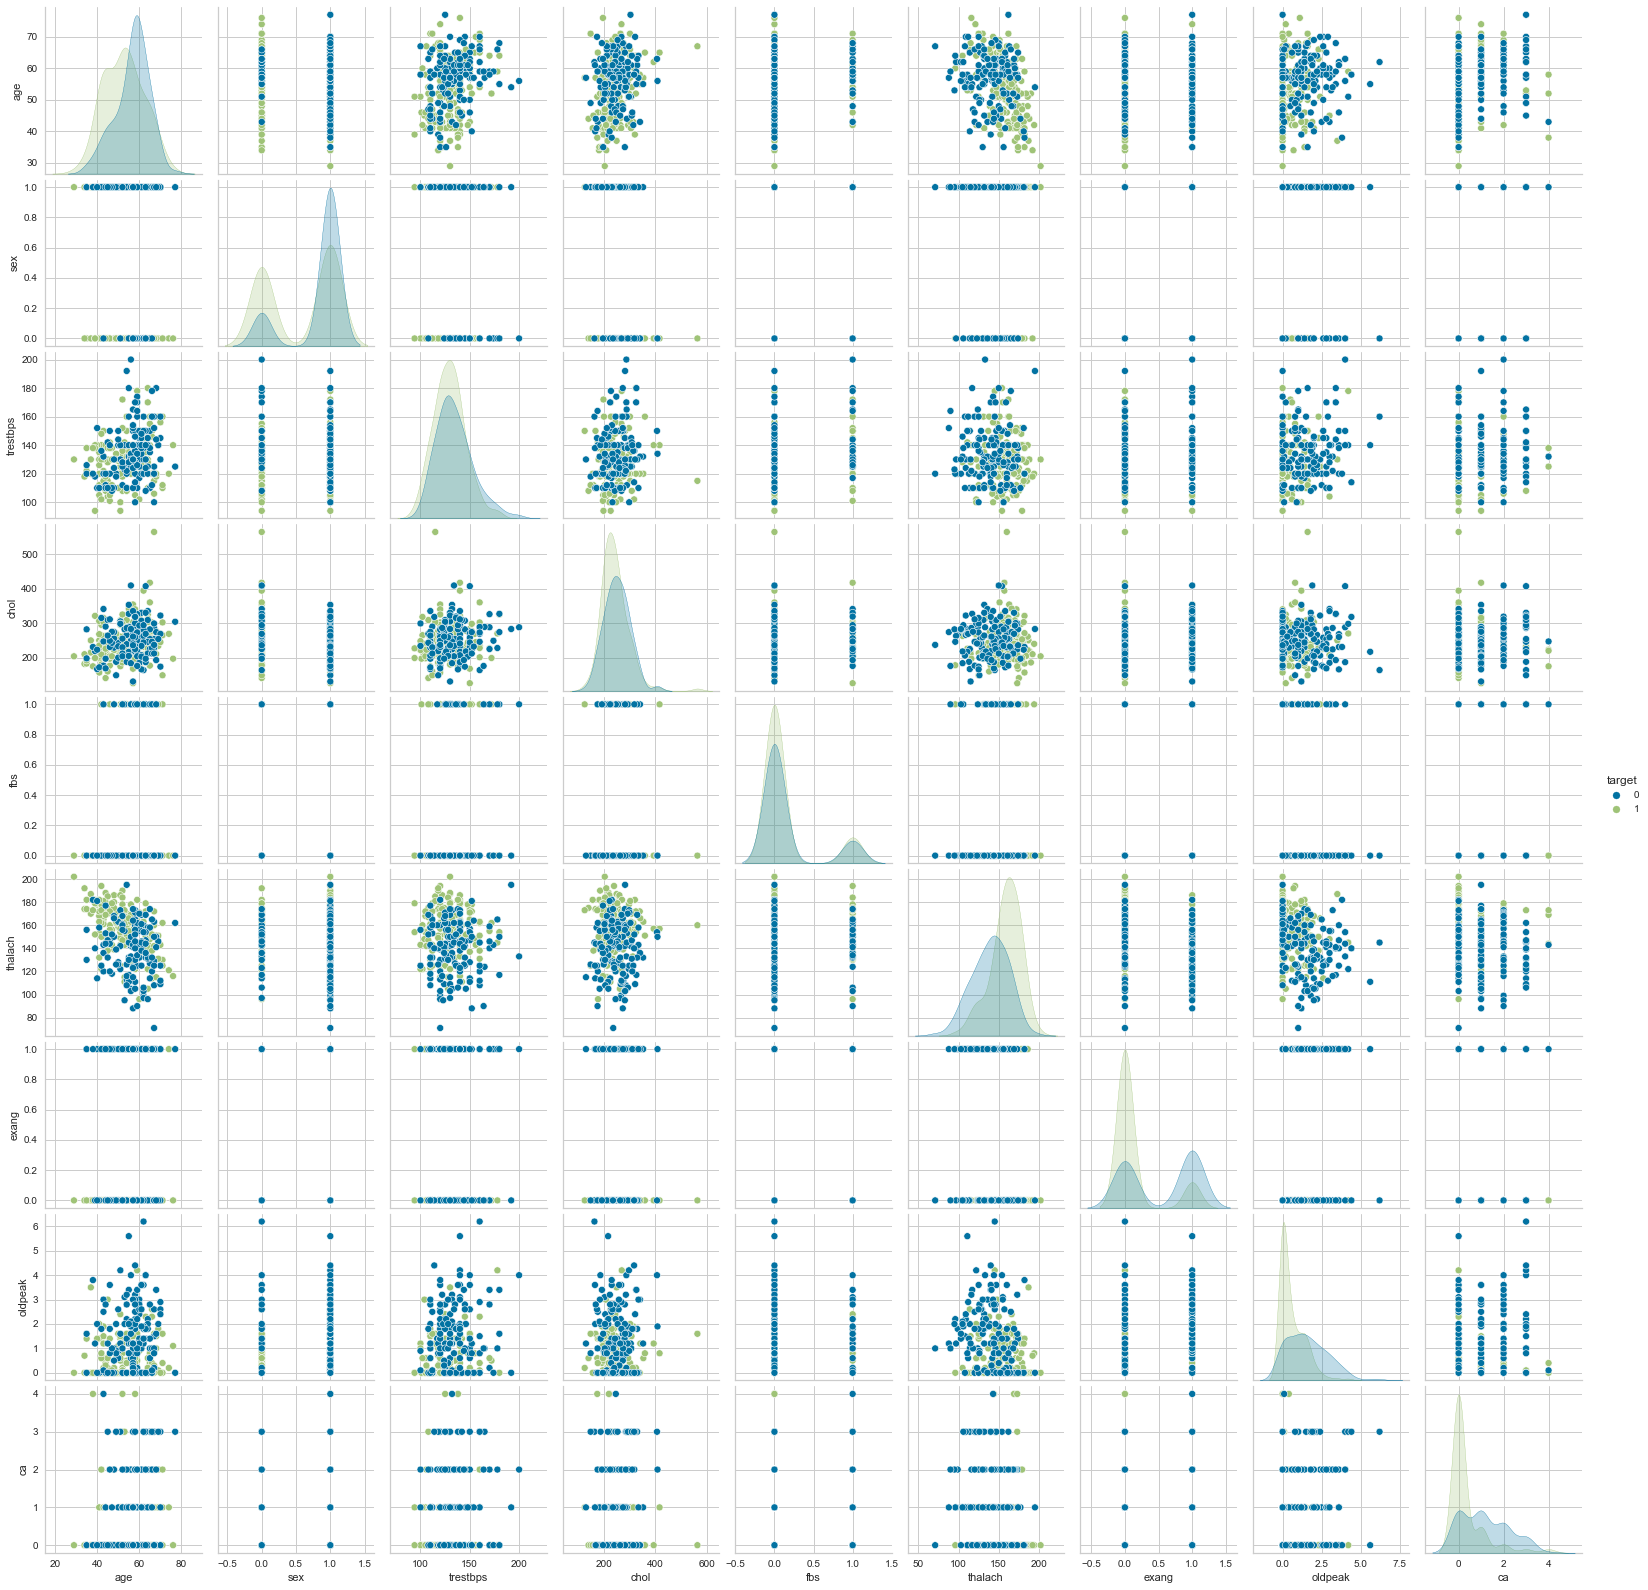

In [32]:
sns.pairplot(df.select_dtypes(include='number'), hue = "target");  # Green:1 Blue:0

In [33]:
# birbirine üstünlüğü olmayan kategoric veriler için getdummies yapılmalı.
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,1,0,0,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.200,0,0,0,0,1,0,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.400,2,0,0,0,1,0,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.200,1,0,0,0,1,0,0,0,1,0,0,1


 # Train | Test Split and Scaling

In [49]:
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [51]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [52]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

##  Model Performance

In [53]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[12  2]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31


Train_Set
[[101  23]
 [ 16 131]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       124
           1       0.85      0.89      0.87       147

    accuracy                           0.86       271
   macro avg       0.86      0.85      0.85       271
weighted avg       0.86      0.86      0.86       271



## Cross Validate

In [54]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.007,0.003,0.765,0.867,0.812,0.786
2,0.006,0.003,0.778,0.933,0.848,0.815
3,0.007,0.002,0.800,0.800,0.800,0.778
4,0.008,0.003,0.778,0.933,0.848,0.815
5,0.007,0.003,0.917,0.733,0.815,0.815
6,0.005,0.002,0.917,0.733,0.815,0.815
7,0.006,0.002,0.812,0.867,0.839,0.815
8,0.006,0.002,0.769,0.714,0.741,0.741
9,0.005,0.002,0.857,0.857,0.857,0.852
10,0.005,0.003,0.929,0.929,0.929,0.926


In [55]:
df_scores.mean()[2:]     #  accuracy:0.88 ==> 0.83 

test_precision   0.832
test_recall      0.837
test_f1          0.830
test_accuracy    0.816
dtype: float64

## GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV
C = np.logspace(0, 10, 20)
model = LogisticRegression()

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20) 
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "l1_ratio" : l1_ratio,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+...
                         'class_weight': ['balanced', None],
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [82]:
grid_model.best_params_

{'C': 3.3598182862837818,
 'class_weight': None,
 'l1_ratio': 0.0,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [83]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)  # 0.81------->0.82

Test_Set
[[12  2]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31


Train_Set
[[100  24]
 [ 15 132]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       124
           1       0.85      0.90      0.87       147

    accuracy                           0.86       271
   macro avg       0.86      0.85      0.85       271
weighted avg       0.86      0.86      0.86       271



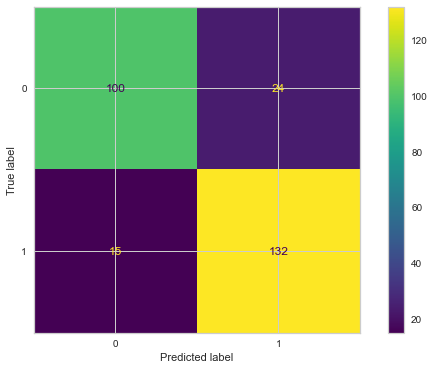

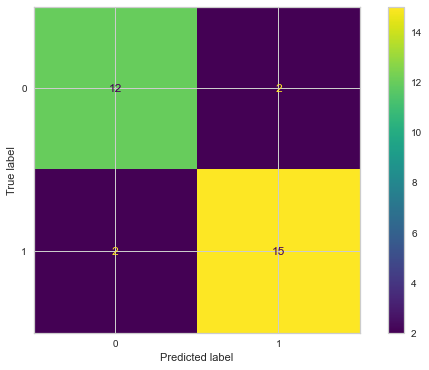

In [85]:
plot_confusion_matrix(grid_model, X_train_scaled, y_train);
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

In [ ]:
# LOG_MODEL FINAL SCORE: 0.88, HATALAI TAHMİN: 4

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)¶

In [86]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

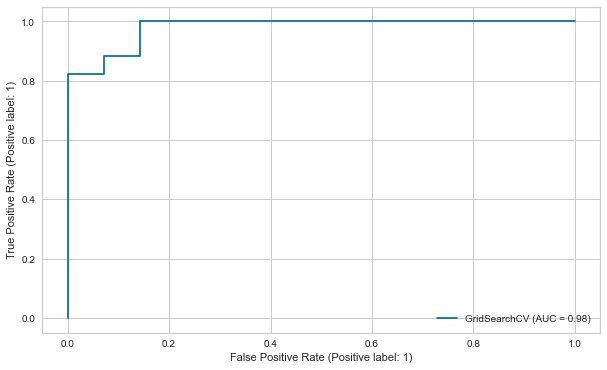

In [87]:
plot_roc_curve(grid_model, X_test_scaled, y_test); # köşeli olma sebebi, çevresindeki 5-6 değere, komşulara baktığı için

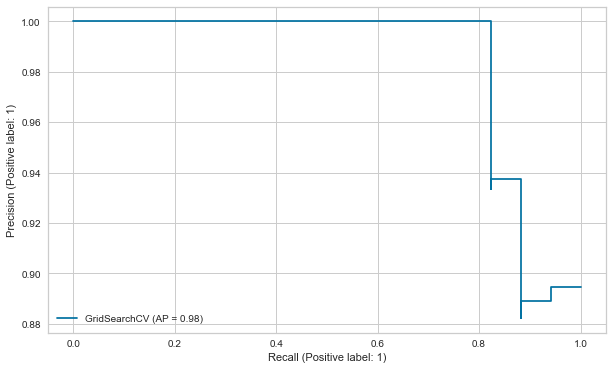

In [88]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [90]:
y_pred = knn_model.predict(X_test_scaled)

## Model Performance:

In [91]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[12  2]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31


Train_Set
[[105  19]
 [ 19 128]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       124
           1       0.87      0.87      0.87       147

    accuracy                           0.86       271
   macro avg       0.86      0.86      0.86       271
weighted avg       0.86      0.86      0.86       271



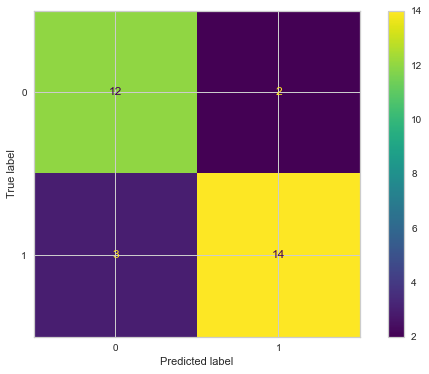

In [92]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

## Elbow Method for Choosing Reasonable K Values

In [93]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
test_error_rates = []


for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

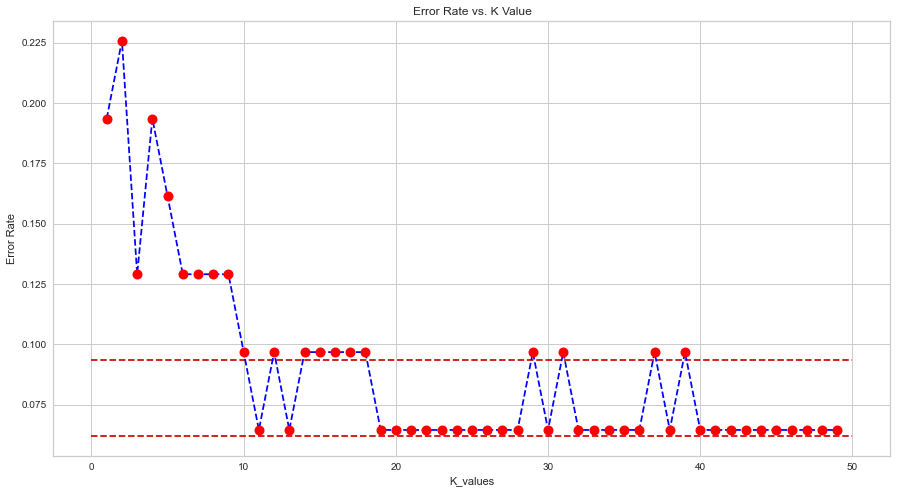

In [95]:
plt.figure(figsize=(15,8))
plt.plot(range(1,50), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.062, xmin = 0, xmax = 50, colors= 'r', linestyles="--")
plt.hlines(y=0.0935, xmin = 0, xmax = 50, colors= 'r', linestyles="--");

 ## Scores by Various K Values

In [96]:
# K=29 
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=29')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

KNeighborsClassifier(n_neighbors=29)

WITH K=29


[[13  1]
 [ 2 15]]


              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.94      0.88      0.91        17

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



In [97]:
# K=5 
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

KNeighborsClassifier()

WITH K=5


[[12  2]
 [ 3 14]]


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
# K, 1-50 ARALIĞINDA İNCELENDİĞİNDE; 
# HATA ORANLARININ K 5-27 ARASINDA PEK DEĞİŞMEYECEĞİ GÖRÜLÜYOR. EN İYİ SONUCUN 3 HATA PAYI VE % 90 DOĞRULUKLA/OLASILIKLA K=29'DA ALINACAĞI GÖRÜLÜYOR.
# K=5 SEÇİLDİĞİNDE HATA PAYI 2/31 ARTACAK, RECALL'DA % 6'LİK, F1_SCORE'DA % 5'LİK BİR AZALMA OLACAK. BU VERİ SETİ KÜÇÜK OLDUĞU İÇİN K=29 SEÇİLEBİLİR.

 ## Cross Validate

In [98]:
model =KNeighborsClassifier()  

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.001,0.004,0.765,0.867,0.812,0.786
2,0.001,0.004,0.706,0.800,0.750,0.704
3,0.000,0.006,0.800,0.800,0.800,0.778
4,0.000,0.004,0.867,0.867,0.867,0.852
5,0.001,0.004,1.000,0.733,0.846,0.852
6,0.001,0.004,0.769,0.667,0.714,0.704
7,0.001,0.005,0.786,0.733,0.759,0.741
8,0.001,0.004,0.769,0.714,0.741,0.741
9,0.000,0.003,0.833,0.714,0.769,0.778
10,0.000,0.003,0.933,1.000,0.966,0.963


In [99]:
df_scores.mean()[2:]        # accuracy:0.82

test_precision   0.823
test_recall      0.790
test_f1          0.802
test_accuracy    0.790
dtype: float64

In [ ]:
# CV dilimlerine baktığımızda her dilim score'larının dengeli olmadığı görülmektedir.

## Gridsearch Method for Choosing Reasonable K Values

In [106]:
knn_grid = KNeighborsClassifier()

In [107]:
k_values= range(1,50)

In [108]:
param_grid = {"n_neighbors":k_values}

In [112]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'f1')

In [113]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1')

In [114]:
knn_grid_model.best_params_  # scoring="accuracy"  içinde aynı sonuç

{'n_neighbors': 20}

In [115]:
print('WITH K=20\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=20

Test_Set
[[14  0]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.94        17

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.94      0.94      0.94        31


Train_Set
[[103  21]
 [ 24 123]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       124
           1       0.85      0.84      0.85       147

    accuracy                           0.83       271
   macro avg       0.83      0.83      0.83       271
weighted avg       0.83      0.83      0.83       271



## Evaluating ROC Curves and AUC

In [116]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [117]:
knn_model = KNeighborsClassifier(n_neighbors=20).fit(X_train_scaled, y_train)

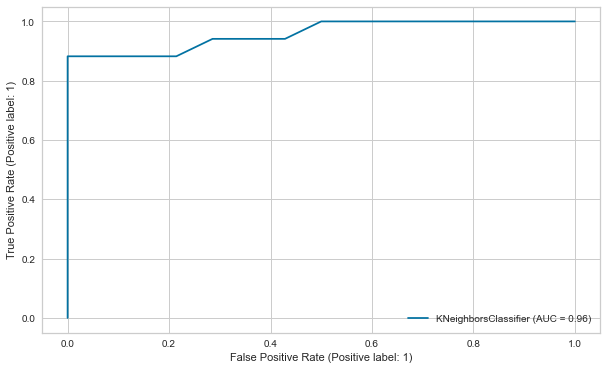

In [118]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [119]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.957983193277311

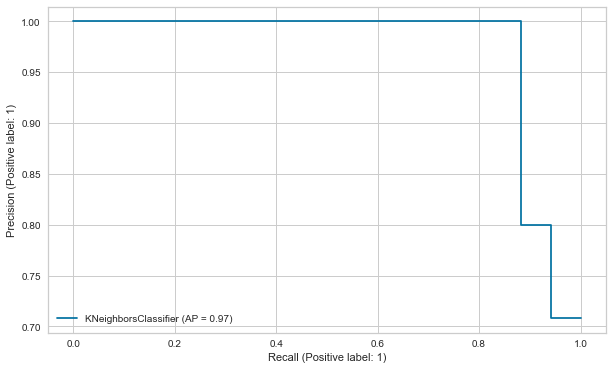

In [120]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);

In [ ]:
# KNN FINAL ACCURACY/F1 SCORE: 0.94, HATALI TAHMİN: 2 

# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 

In [ ]:
KNN, K=20 İLE LOG_MODEL'E GÖRE % 6 DAHA İYİ SCORE VERMEKTE VE HATALI TAHMİN SAYISINI DA DÖRTTEN İKİYE DÜŞÜRMEKTEDİR.